In [347]:
import mindscope_utilities
import mindscope_utilities.ophys
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc
import visual_behavior.plotting as vbp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from visual_behavior.data_access import from_lims
import visual_behavior.database as db

from tqdm import tqdm
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [162]:
%matplotlib notebook

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
glm_version = '16_events_all_L2_optimize_by_session'
glm_results =  gat.retrieve_results({'glm_version': glm_version}, results_type='full')

In [344]:
glm_results_summary =  gat.retrieve_results({'glm_version': glm_version}, results_type='summary')

In [4]:
cache = bpc.VisualBehaviorOphysProjectCache.from_lims()

In [5]:
session_table = cache.get_ophys_session_table()
experiment_table = cache.get_ophys_experiment_table()

In [500]:
glm_results_summary.query('cell_specimen_id == 1086615960')['ophys_experiment_id'].unique()

array([932372705, 940433470, 935514366, 936500611, 930996073, 939471278,
       938002077])

In [506]:
experiment_table.columns

Index(['equipment_name', 'donor_id', 'full_genotype', 'mouse_id',
       'reporter_line', 'driver_line', 'sex', 'age_in_days', 'foraging_id',
       'cre_line', 'indicator', 'session_number',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'ophys_session_id',
       'behavior_session_id', 'ophys_container_id', 'project_code',
       'container_workflow_state', 'experiment_workflow_state', 'session_name',
       'isi_experiment_id', 'imaging_depth', 'targeted_structure',
       'published_at', 'date_of_acquisition', 'session_type'],
      dtype='object')

In [508]:
experiment_table.query('ophys_container_id == 1026722854')[['equipment_name', 'full_genotype', 'date_of_acquisition', 'session_type', 'experiment_workflow_state']].sort_values(by='date_of_acquisition')

equipment_name  \
ophys_experiment_id                  
929655728                   MESO.1   
930996073                   MESO.1   
932372705                   MESO.1   
935514366                   MESO.1   
936500611                   MESO.1   
938002077                   MESO.1   
939471278                   MESO.1   
940433470                   MESO.1   
943518716                   MESO.1   

                                                     full_genotype  \
ophys_experiment_id                                                  
929655728            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
930996073            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
932372705            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
935514366            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
936500611            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
938002077            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
939471278            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
940433470            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
943518716            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   

                           date_of_acquisition  \
ophys_experiment_id                              
929655728           2019-08-22 08:21:33.000000   
930996073           2019-08-23 08:11:32.653400   
932372705           2019-08-26 08:26:26.815263   
935514366           2019-08-28 08:23:18.718157   
936500611           2019-08-30 09:36:00.434110   
938002077           2019-09-03 08:13:17.884589   
939471278           2019-09-04 08:16:32.270992   
940433470           2019-09-05 09:19:35.394918   
943518716           2019-09-06 08:37:56.025973   

                                        session_type experiment_workflow_state  
ophys_experiment_id                                                             
929655728                           OPHYS_1_images_A                    failed  
930996073                           OPHYS_1_images_A                    passed  
932372705                   OPHYS_2_images_B_passive                    passed  
935514366                           OPHYS_4_images_B                    passed  
936500611                           OPHYS_6_images_B                    passed  
938002077                           OPHYS_3_images_A                    passed  
939471278                   OPHYS_2_images_A_passive                    passed  
940433470                   OPHYS_5_images_B_passive                    passed  
943518716            OPHYS_7_receptive_field_mapping                    failed

In [6]:
oeid = glm_results['ophys_experiment_id'].sample().iloc[0]
oeid

916093599

In [7]:
experiment = cache.get_behavior_ophys_experiment(oeid)

In [8]:
experiment.dff_traces

cell_roi_id  \
cell_specimen_id                
1086568081         1080820505   
1086508419         1080820509   
1086592725         1080820511   
1086520188         1080820516   
1086557836         1080820520   
...                       ...   
1086534139         1080822413   
1086564566         1080822416   
1086513233         1080822423   
1086594350         1080822427   
1086514797         1080822432   

                                                                dff  
cell_specimen_id                                                     
1086568081        [0.2305864840745926, 0.34910187125205994, 0.37...  
1086508419        [0.2955407202243805, 0.20696237683296204, 0.21...  
1086592725        [0.5199466347694397, 0.1997414529323578, 0.105...  
1086520188        [0.36395975947380066, 0.19665251672267914, 0.1...  
1086557836        [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  
...                                                             ...  
1086534139        [0.20167233049869537, 0.27064475417137146, 0.3...  
1086564566        [0.3881225287914276, 0.29887279868125916, 0.32...  
1086513233        [0.24341559410095215, 0.15451137721538544, 0.1...  
1086594350        [0.45423993468284607, 0.2561274468898773, 0.39...  
1086514797        [0.4110100269317627, 0.4409728944301605, 0.222...  

[326 rows x 2 columns]

In [9]:
experiment.events

cell_roi_id  \
cell_specimen_id                
1086592725         1080820511   
1086539933         1080820525   
1086526279         1080820560   
1086516964         1080820573   
1086507092         1080820577   
...                       ...   
1086531451         1080822388   
1086534642         1080822397   
1086534139         1080822413   
1086513233         1080822423   
1086514797         1080822432   

                                                             events  \
cell_specimen_id                                                      
1086592725        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086539933        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086526279        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086516964        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086507092        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                             ...   
1086531451        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086534642        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086534139        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086513233        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1086514797        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    filtered_events  lambda  \
cell_specimen_id                                                              
1086592725        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.1142   
1086539933        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0316   
1086526279        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0249   
1086516964        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0366   
1086507092        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0505   
...                                                             ...     ...   
1086531451        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0183   
1086534642        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0515   
1086534139        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0306   
1086513233        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0465   
1086514797        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  0.0414   

                  noise_std  
cell_specimen_id             
1086592725         0.098984  
1086539933         0.051973  
1086526279         0.045882  
1086516964         0.055687  
1086507092         0.065515  
...                     ...  
1086531451         0.039425  
1086534642         0.067402  
1086534139         0.050956  
1086513233         0.062932  
1086514797         0.060853  

[172 rows x 5 columns]

In [10]:
neural_data = mindscope_utilities.ophys.build_tidy_cell_df(experiment)

In [13]:
len(neural_data['cell_specimen_id'].unique())

172

In [18]:
stim_table = experiment.stimulus_presentations
stim_table

duration  end_frame  image_index image_name  \
stimulus_presentations_id                                                
0                           0.25021    18000.0            0      im065   
1                           0.25022    18045.0            0      im065   
2                           0.25020    18090.0            0      im065   
3                               NaN        NaN            8    omitted   
4                           0.25023    18180.0            0      im065   
...                             ...        ...          ...        ...   
4794                        0.25020   233730.0            7      im069   
4795                        0.25020   233775.0            7      im069   
4796                        0.25054   233820.0            7      im069   
4797                        0.25030   233865.0            7      im069   
4798                            NaN        NaN            8    omitted   

                                                                   image_set  \
stimulus_presentations_id                                                      
0                          Natural_Images_Lum_Matched_set_training_2017.0...   
1                          Natural_Images_Lum_Matched_set_training_2017.0...   
2                          Natural_Images_Lum_Matched_set_training_2017.0...   
3                                                                    omitted   
4                          Natural_Images_Lum_Matched_set_training_2017.0...   
...                                                                      ...   
4794                       Natural_Images_Lum_Matched_set_training_2017.0...   
4795                       Natural_Images_Lum_Matched_set_training_2017.0...   
4796                       Natural_Images_Lum_Matched_set_training_2017.0...   
4797                       Natural_Images_Lum_Matched_set_training_2017.0...   
4798                                                                 omitted   

                           index  is_change  omitted  start_frame  start_time  \
stimulus_presentations_id                                                       
0                              0      False    False        17985   307.48839   
1                              1      False    False        18030   308.23899   
2                              2      False    False        18075   308.98962   
3                              0      False     True        18119   309.72356   
4                              3      False    False        18165   310.49084   
...                          ...        ...      ...          ...         ...   
4794                        4594      False    False       233715  3905.92457   
4795                        4595      False    False       233760  3906.67518   
4796                        4596      False    False       233805  3907.42576   
4797                        4597      False    False       233850  3908.17667   
4798                         200      False     True       233894  3908.91033   

                            stop_time  
stimulus_presentations_id              
0                           307.73860  
1                           308.48921  
2                           309.23982  
3                                 NaN  
4                           310.74107  
...                               ...  
4794                       3906.17477  
4795                       3906.92538  
4796                       3907.67630  
4797                       3908.42697  
4798                              NaN  

[4799 rows x 11 columns]

In [39]:
cell_specimen_id = 1086592725

In [41]:
query_string = '''
    select * from cell_rois
    where cell_specimen_id = {}
'''
db.lims_query(query_string.format(cell_specimen_id))

id  cell_specimen_id  ophys_experiment_id    x    y  width  height  \
0  1080820511        1086592725            916093599  303  100     15      16   

   valid_roi                                        mask_matrix  \
0       True  [[False, False, False, False, False, False, Fa...   

   max_correction_up  max_correction_down  max_correction_right  \
0               11.0                 13.0                   7.0   

   max_correction_left  mask_image_plane  ophys_cell_segmentation_run_id  
0                 25.0                 1                      1080698291

In [43]:
oeid = 916093599
from_lims.get_all_ids_for_ophys_experiment_id(oeid)

ophys_experiment_id  ophys_session_id  behavior_session_id  \
0            916093599         915587736            915667469   

   ophys_container_id super_container_id  
0           906963896               None

In [44]:
from_lims.get_ophys_experiment_ids_for_ophys_container_id(906963896)

ophys_experiment_id
0             911149119
1             911642167
2             912673402
3             914062456
4             914536934
5             915150256
6             916093599
7             917785659
8             918548272
9             919314708
10            923100548

In [75]:
experiment.metadata

/home/dougo/anaconda3/envs/vba/lib/python3.8/site-packages/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2019-08-13 20:01:40+00:00) for behavior session (922869624) deviates by more than an hour from the `start_time` (2019-08-13 13:23:42.565000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod1/specimen_866070199/behavior_session_922869624/922743776.pkl
  warnings.warn(
/home/dougo/anaconda3/envs/vba/lib/python3.8/site-packages/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2019-08-13 20:01:40+00:00) for behavior session (922869624) deviates by more than an hour from the `start_time` (2019-08-13 13:23:42.565000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod1/specimen_866070199/behavior_session_922869624/92274

{'equipment_name': 'CAM2P.3',
 'sex': 'M',
 'age_in_days': 157,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_6_images_A',
 'date_of_acquisition': Timestamp('2019-08-13 20:01:40+0000', tz='UTC'),
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'indicator': 'GCaMP6f',
 'cre_line': 'Slc17a7-IRES2-Cre',
 'behavior_session_uuid': UUID('a0f43117-a1ac-4b8d-8749-4c5777311a4b'),
 'driver_line': ['Camk2a-tTA', 'Slc17a7-IRES2-Cre'],
 'mouse_id': 462544,
 'full_genotype': 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
 'behavior_session_id': 922869624,
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'experiment_container_id': 906963896,
 'field_of_view_height': 512,
 'field_of_view_width': 452,
 'imaging_depth': 375,
 'imaging_plane_group': None,
 'imaging_plane_group_count': 0,
 'ophys_experiment_id': 923100548,
 'ophys_frame_rate': 31.0,
 'ophys_session_id': 922743776,
 'project_code': 'VisualBehaviorTask1B',
 'targeted_structure': 'VISp'}

In [482]:
def is_cell_in_experiment(cell_specimen_id, experiment):
    return cell_specimen_id in experiment.cell_specimen_table.index

def get_text(cell_specimen_id, experiment):
    metadata = experiment.metadata
    text = 'ophys_experiment_id = {}, session_type = {}, date = {}, equipment = {}  | cell in experiment? {}'.format(
        experiment.ophys_experiment_id,
        metadata['session_type'],
        metadata['date_of_acquisition'],
        metadata['equipment_name'],
        is_cell_in_experiment(cell_specimen_id, experiment)
    )
    return text

def get_experiments(ophys_experiment_ids):
    experiments = {}
    for ophys_experiment_id in ophys_experiment_ids:
        experiments[ophys_experiment_id] = cache.get_behavior_ophys_experiment(ophys_experiment_id)
    return experiments

def get_bounding_box(cell_specimen_id, buffer = 60):
    query_string = '''
        select * from cell_rois
        where cell_specimen_id = {}
    '''
    cell_df = db.lims_query(query_string.format(cell_specimen_id))
    
    left = cell_df['x'].min() - buffer
    width = (cell_df['x'].max() + buffer) - left
    top = cell_df['y'].min() - buffer
    height = (cell_df['y'].max() + buffer) - top
    
    return left, top, width, height
    

def add_bounding_box(left, top, width, height, ax):
    
    # Create a Rectangle patch
    rect = patches.Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    
def add_tidy_neural_data(experiment):
    experiment.tidy_neural_data = mindscope_utilities.ophys.build_tidy_cell_df(experiment)
    
def add_event_triggered_averages(experiment, cell_specimen_id):
    stim_table = experiment.stimulus_presentations
    image_indices = np.sort(stim_table['image_index'].unique())

    if not hasattr(experiment, 'event_triggered_responses'):
        experiment.event_triggered_responses = pd.DataFrame({'cell_specimen_id':[], 'image_index':[]})

    for image_index in tqdm(image_indices, desc = 'calculating event triggered responses'):
        # avoid adding the etr for this cell/event twice
        if len(experiment.event_triggered_responses.query('cell_specimen_id == @cell_specimen_id and image_index == @image_index')) == 0:
            this_etr = mindscope_utilities.event_triggered_response(
                data = experiment.tidy_neural_data.query('cell_specimen_id == @cell_specimen_id'),
                t = 'timestamps',
                y = 'dff',
                event_times = stim_table.query('image_index == @image_index')['start_time'],
                t_before = 2,
                t_after = 2,
            )
            this_etr['cell_specimen_id'] = cell_specimen_id
            this_etr['image_index'] = image_index

            experiment.event_triggered_responses = pd.concat((
                experiment.event_triggered_responses, 
                this_etr
            ))

def show_dropout_summary(ophys_experiment_id, cell_specimen_id, glm_version, ax):
    search_dict = {
        'cell_specimen_id':cell_specimen_id, 
        'ophys_experiment_id':ophys_experiment_id,
        'glm_version': glm_version,
    }
    this_cell_results_summary = gat.retrieve_results(search_dict, results_type='summary')

    dropouts_to_show = [
        'all-images',
        'omissions',
        'behavioral',
        'cognitive',
        'expectation',
        'licks',
        'pupil',
        'running',
        'pupil_and_omissions',
        'pupil_and_running',
        'hits'
    ]
    dropouts_to_show += ['single-'+dropout for dropout in dropouts_to_show]

    bp = gvt.plot_dropout_summary(
        results_summary = this_cell_results_summary.query('dropout in @dropouts_to_show'), 
        cell_specimen_id = cell_specimen_id, 
        ax = ax, 
        dropouts_to_show=None, 
        dropouts_to_plot='both', 
        dropouts_to_exclude=[],
        ylabel_fontsize=8, 
        ticklabel_fontsize=8, 
        title_fontsize=8,
        legend_fontsize=6
    )

    

In [322]:
cell_specimen_id = 1086502281


query_string = '''
    select * from cell_rois
    where cell_specimen_id = {}
'''
single_oeid = db.lims_query(query_string.format(cell_specimen_id)).iloc[0]['ophys_experiment_id']
all_ids = from_lims.get_all_ids_for_ophys_experiment_id(single_oeid)
ophys_experiment_ids = from_lims.get_ophys_experiment_ids_for_ophys_container_id(all_ids.iloc[0]['ophys_container_id'])['ophys_experiment_id']
ophys_experiment_ids = [ophys_experiment_id for ophys_experiment_id in ophys_experiment_ids if ophys_experiment_id in experiment_table.index and experiment_table.loc[ophys_experiment_id]['experiment_workflow_state'] == 'passed']

experiments = get_experiments(ophys_experiment_ids)

In [332]:
ophys_experiment_id in experiment_table.index and cell_specimen_id in experiment.cell_specimen_table.index and experiment_table.loc[ophys_experiment_id]['experiment_workflow_state'] == 'passed'

True

In [333]:
# for ophys_experiment_id in tqdm(ophys_experiment_ids):
#     if ophys_experiment_id in experiment_table.index and experiment_table.loc[ophys_experiment_id]['experiment_workflow_state'] == 'passed':
#         add_tidy_neural_data(experiments[ophys_experiment_id])
    
for ophys_experiment_id in ophys_experiment_ids:
    if ophys_experiment_id in experiment_table.index and cell_specimen_id in experiment.cell_specimen_table.index and experiment_table.loc[ophys_experiment_id]['experiment_workflow_state'] == 'passed':
        add_event_triggered_averages(experiments[ophys_experiment_id], cell_specimen_id)

calculating event triggered responses: 100%|██████████| 9/9 [00:00<00:00, 252.41it/s]


In [484]:
glm_version

'16_events_all_L2_optimize_by_session'

<IPython.core.display.Javascript object>


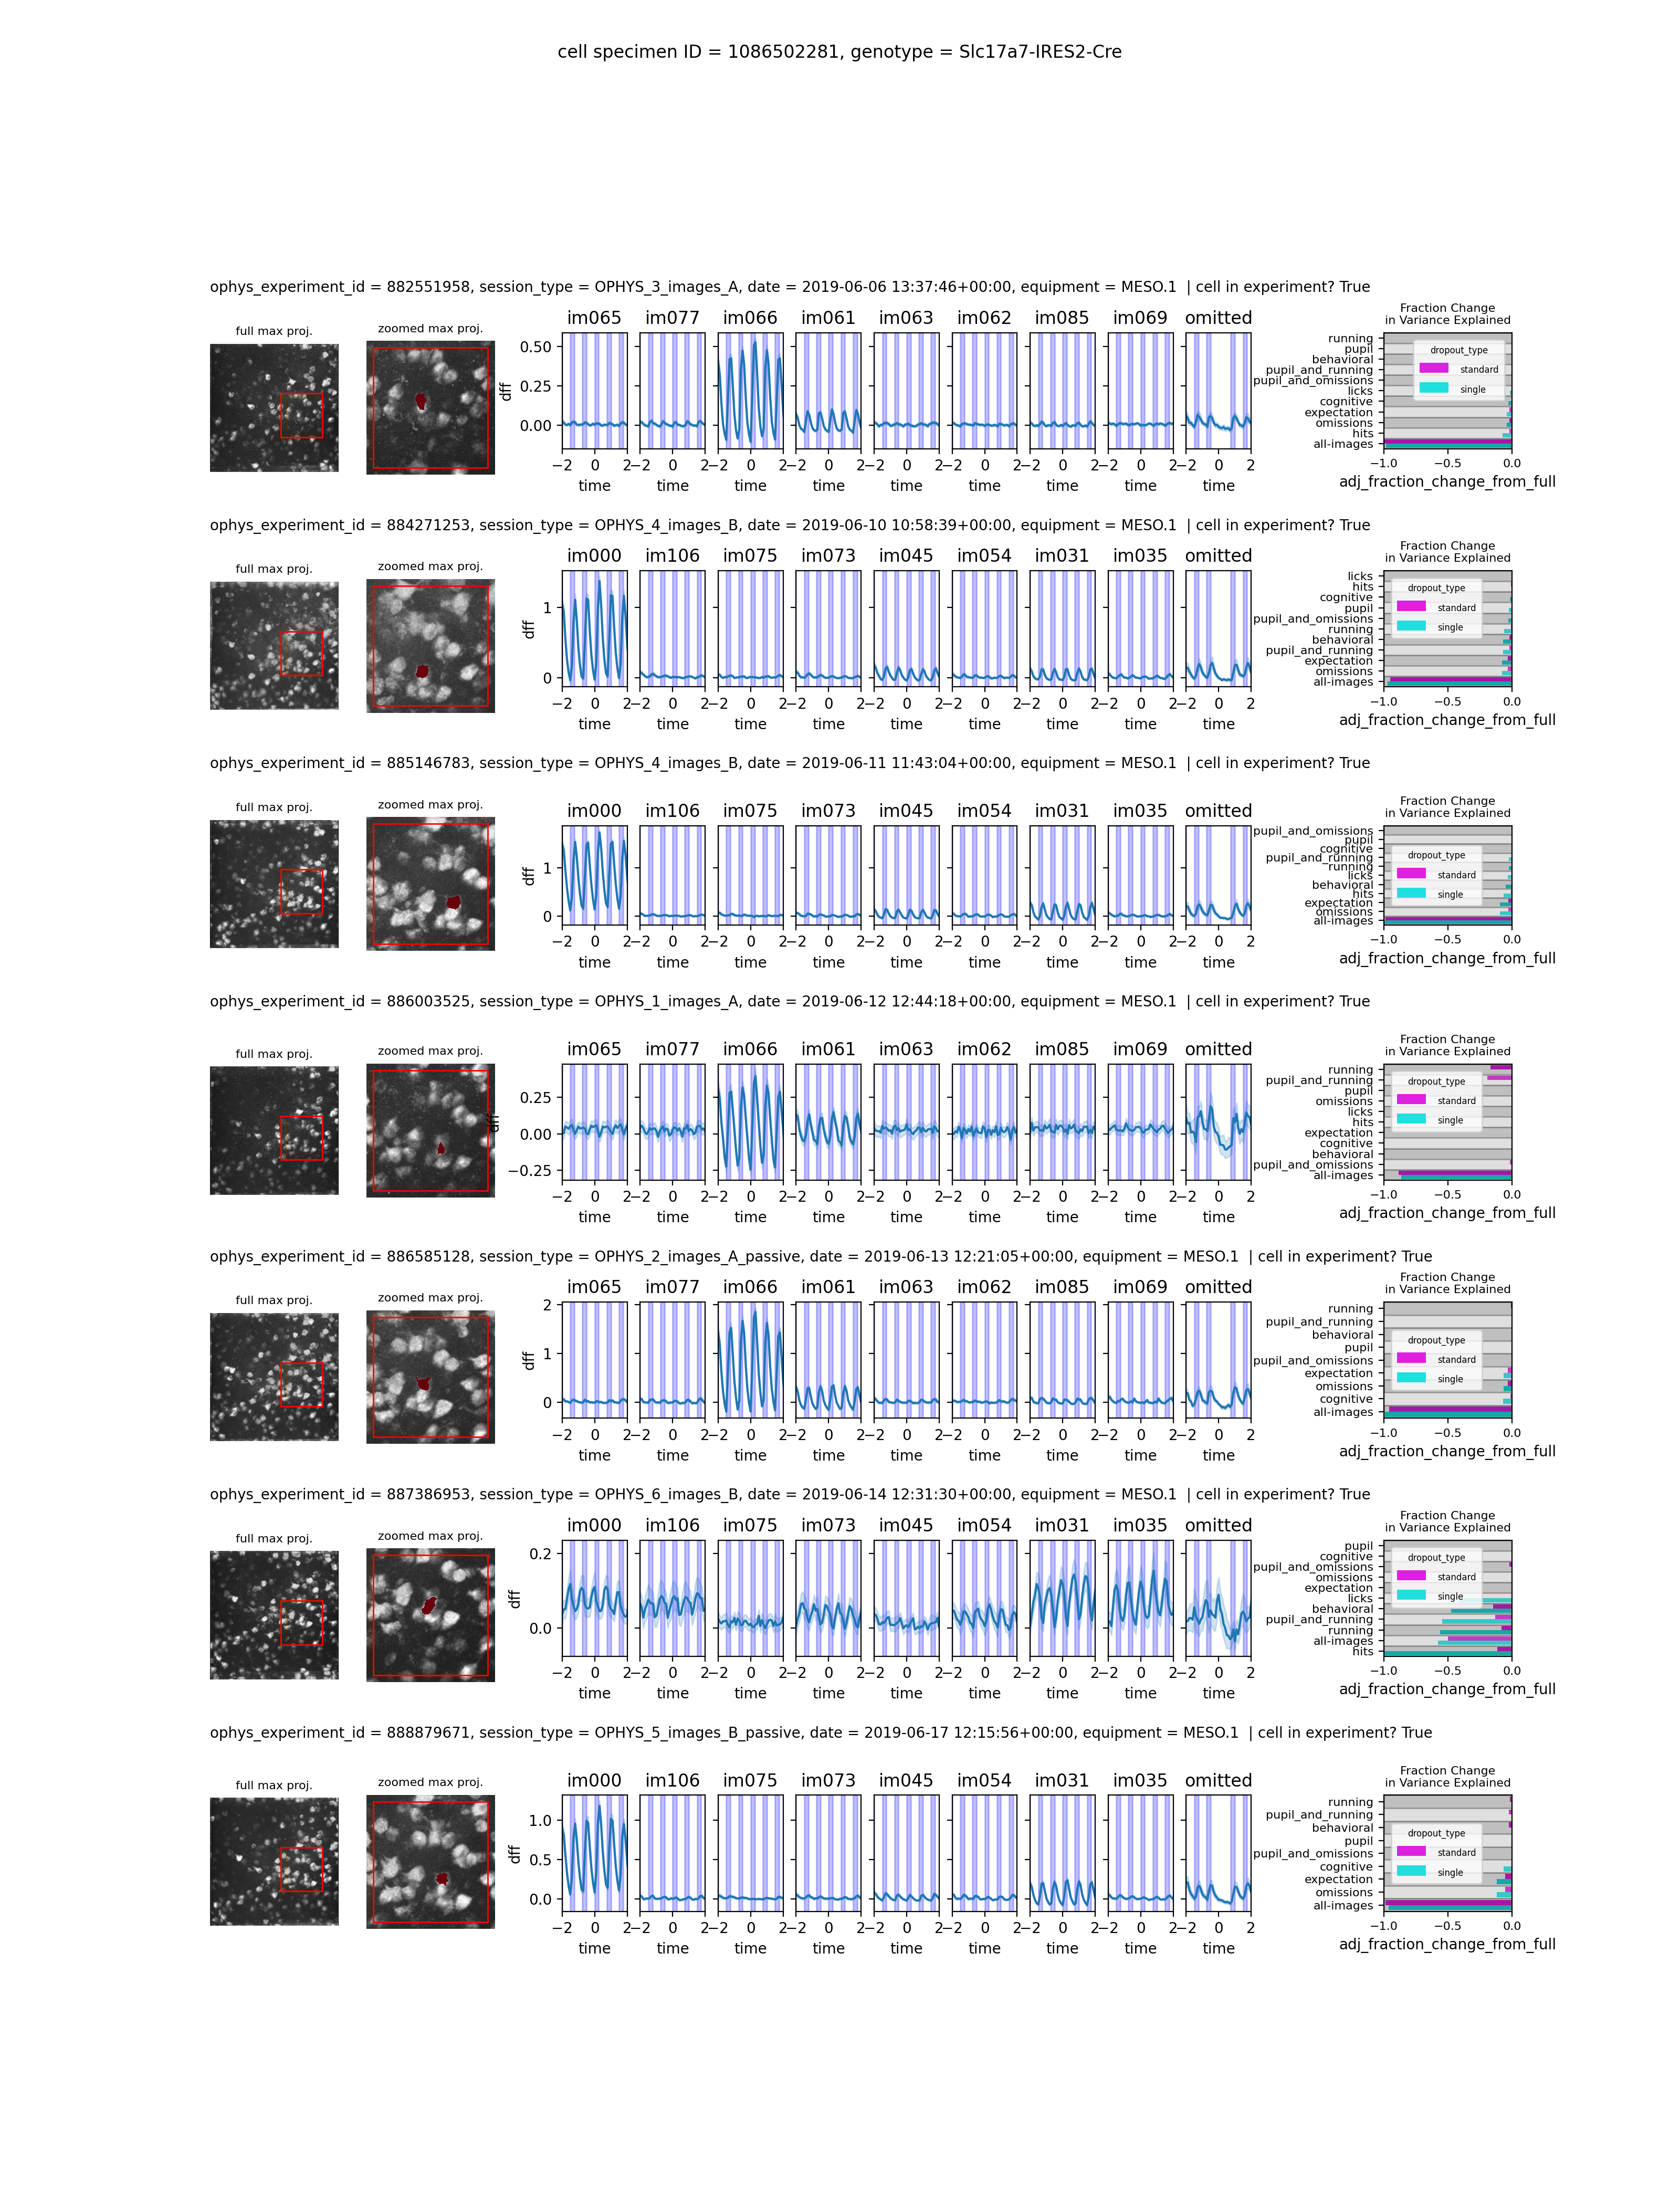

100%|██████████| 7/7 [00:51<00:00,  7.38s/it]


In [494]:
row_buffer = 0.03
n_rows = len(ophys_experiment_ids)
glm_version = '15_events_L2_optimize_by_session'

cell_session_plot = plt.figure(figsize=(16,3*len(ophys_experiment_ids)))
axes = {}
for row, ophys_experiment_id in tqdm(enumerate(ophys_experiment_ids), total=len(ophys_experiment_ids)):
    
    experiment = experiments[ophys_experiment_id]
    
    row_start = row/n_rows
    row_end = (row + 1)/n_rows
    
    axes[ophys_experiment_id] = {
        'text': vbp.placeAxesOnGrid(cell_session_plot, xspan = [0,1], yspan = [row_start, row_start + row_buffer]),
        'mask': vbp.placeAxesOnGrid(cell_session_plot, xspan = [0,0.1], yspan = [row_start + row_buffer, row_end]),
        'zoomed_mask': vbp.placeAxesOnGrid(cell_session_plot, xspan = [0.125, 0.225], yspan = [row_start + row_buffer, row_end]),
        'visual_responses': vbp.placeAxesOnGrid(cell_session_plot, xspan = [0.275, 0.8], yspan = [row_start + 1.5*row_buffer, row_end - row_buffer], dim = [1,9], sharey=True),
        'model_dropout_summary': vbp.placeAxesOnGrid(cell_session_plot, xspan = [0.9, 1], yspan = [row_start + 1.5*row_buffer, row_end - row_buffer],)
    }


    axes[ophys_experiment_id]['text'].text(0, 0, '{}\n'.format(get_text(cell_specimen_id, experiment)), ha='left', va='bottom')
    axes[ophys_experiment_id]['text'].axis('off')
    
    axes[ophys_experiment_id]['mask'].imshow(experiment.max_projection, cmap = 'gray')
    axes[ophys_experiment_id]['mask'].axis('off')
    axes[ophys_experiment_id]['mask'].set_title('full max proj.', fontsize = 8)
    
    left, top, width, height = get_bounding_box(cell_specimen_id)
    add_bounding_box(left, top, width, height, axes[ophys_experiment_id]['mask'])
    
    axes[ophys_experiment_id]['zoomed_mask'].imshow(experiment.max_projection, cmap = 'gray')
    axes[ophys_experiment_id]['zoomed_mask'].axis('off')
    axes[ophys_experiment_id]['zoomed_mask'].set_title('zoomed max proj.', fontsize = 8)
    add_bounding_box(left, top, width, height, axes[ophys_experiment_id]['zoomed_mask'])
    
    axes[ophys_experiment_id]['zoomed_mask'].set_xlim(left-10, left + width + 10)
    axes[ophys_experiment_id]['zoomed_mask'].set_ylim(top + height + 10, top-10, )
    
    if is_cell_in_experiment(cell_specimen_id, experiment):
        mask = experiments[ophys_experiment_id].cell_specimen_table.loc[cell_specimen_id]['roi_mask'].astype(float)
        mask[np.where(mask == 0)] = np.nan
        axes[ophys_experiment_id]['zoomed_mask'].imshow(mask, cmap = 'Reds_r')
        
    if hasattr(experiment, 'event_triggered_responses') and cell_specimen_id in experiment.cell_specimen_table.index:
        stim_table = experiment.stimulus_presentations
        for col, image_index in enumerate(np.sort(stim_table['image_index'].unique())):
            image_name = stim_table.query('image_index == @image_index')['image_name'].iloc[0]
            sns.lineplot(
                data = experiment.event_triggered_responses.query('cell_specimen_id == @cell_specimen_id and image_index == @image_index'),
                x = 'time',
                y = 'dff',
                ax = axes[ophys_experiment_id]['visual_responses'][col] 
            )
            vbp.designate_flashes(
                axes[ophys_experiment_id]['visual_responses'][col], 
                omit=0 if image_name == 'omitted' else None, 
                pre_color='blue', 
                post_color='blue'
            )
            axes[ophys_experiment_id]['visual_responses'][col].set_title(image_name)
            axes[ophys_experiment_id]['visual_responses'][col].set_xlim(-2,2)
    else:
        for col in range(9):
            axes[ophys_experiment_id]['visual_responses'][col].axis('off')
            
    
    show_dropout_summary(ophys_experiment_id, cell_specimen_id, glm_version, axes[ophys_experiment_id]['model_dropout_summary'])
    
    
        
cell_session_plot.suptitle('cell specimen ID = {}, genotype = {}'.format(cell_specimen_id, experiment.metadata['cre_line'])) 
cell_session_plot.tight_layout()


<IPython.core.display.Javascript object>


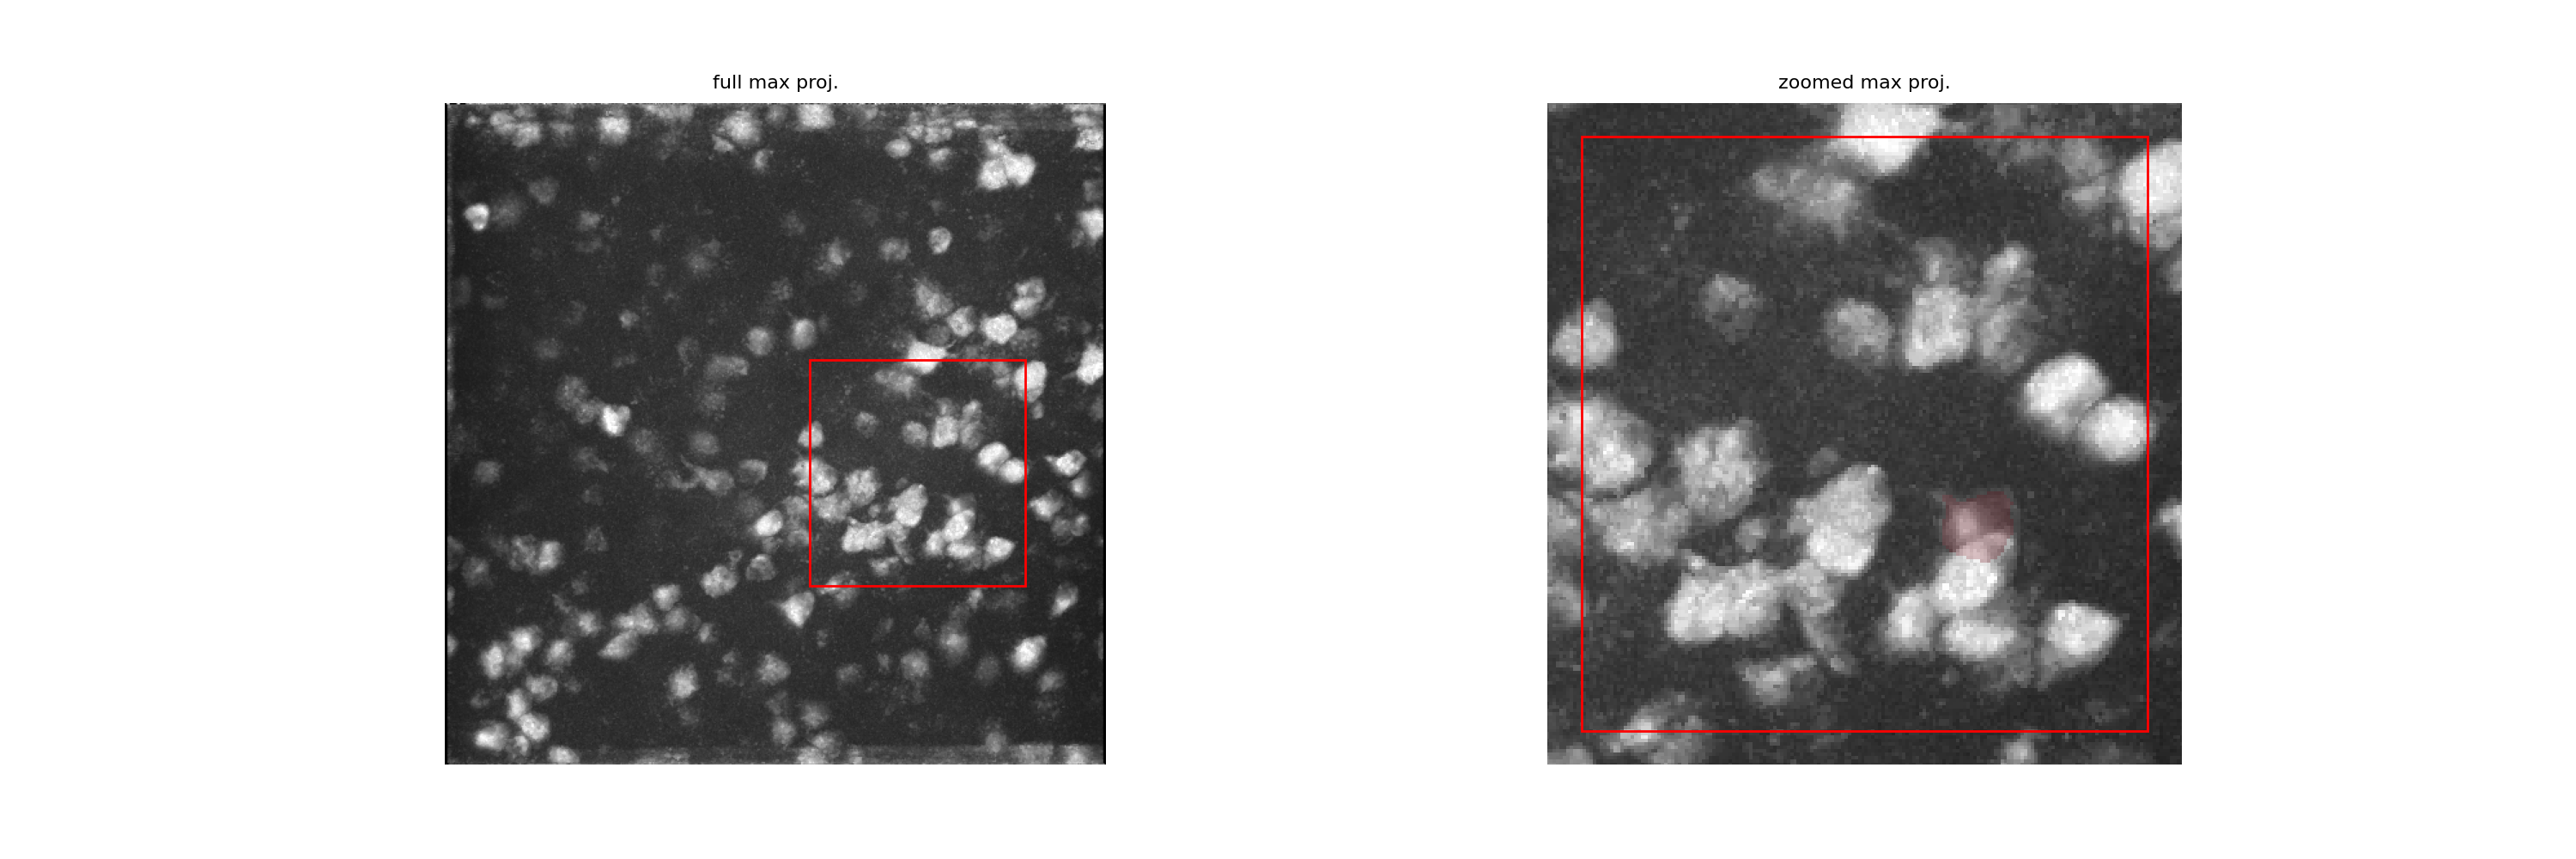

885146783


In [481]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ophys_experiment_id = ophys_experiment_ids[2]
print(ophys_experiment_id)
experiment = experiments[ophys_experiment_id]

ax[0].imshow(experiment.max_projection, cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('full max proj.', fontsize = 8)

# left, top, width, height = get_bounding_box(cell_specimen_id)
add_bounding_box(left, top, width, height, ax[0])

ax[1].imshow(experiment.max_projection, cmap = 'gray')
ax[1].axis('off')
ax[1].set_title('zoomed max proj.', fontsize = 8)
add_bounding_box(left, top, width, height, ax[1])

ax[1].set_xlim(left-10, left + width + 10)
ax[1].set_ylim(top + height + 10, top-10, )

if is_cell_in_experiment(cell_specimen_id, experiment):
    mask = experiments[ophys_experiment_id].cell_specimen_table.loc[cell_specimen_id]['roi_mask'].astype(float)
    mask[np.where(mask == 0)] = np.nan
    ax[1].imshow(mask, cmap = 'Reds_r', alpha=0.25)

In [469]:
top

198

In [480]:
cell_df = db.lims_query(query_string.format(cell_specimen_id))
buffer = 60
    
left = cell_df['x'].min() - buffer
width = (cell_df['x'].max() + buffer) - left
top = cell_df['y'].min() - buffer
height = (cell_df['y'].max() + buffer) - top

In [464]:
cell_df

id  cell_specimen_id  ophys_experiment_id    x    y  width  height  \
0  1080810324        1086502281            888879671  373  301     20      20   
1  1080816071        1086502281            887386953  352  258     23      27   
2  1080817039        1086502281            886585128  343  286     24      21   
3  1080823881        1086502281            886003525  375  303     13      19   
4  1080831157        1086502281            885146783  389  303     21      21   
5  1080830290        1086502281            884271253  344  313     20      21   
6  1080839263        1086502281            882551958  342  264     19      26   

   valid_roi                                        mask_matrix  \
0       True  [[False, False, False, False, False, False, Fa...   
1       True  [[False, False, False, False, False, False, Fa...   
2       True  [[False, True, True, False, False, False, Fals...   
3       True  [[False, False, False, False, True, True, True...   
4       True  [[False, False, False, False, False, False, Fa...   
5       True  [[False, False, False, False, False, False, Fa...   
6       True  [[False, False, False, False, False, False, Tr...   

   max_correction_up  max_correction_down  max_correction_right  \
0               30.0                 18.0                  19.0   
1               30.0                 19.0                   6.0   
2               10.0                 20.0                  11.0   
3               23.0                 23.0                  17.0   
4               16.0                 29.0                  11.0   
5                6.0                 24.0                  13.0   
6               30.0                 17.0                  17.0   

   max_correction_left  mask_image_plane  ophys_cell_segmentation_run_id  
0                 17.0                 0                      1080693771  
1                 19.0                 1                      1080697425  
2                 14.0                 0                      1080697367  
3                 19.0                 0                      1080698149  
4                 17.0                 0                      1080700913  
5                 11.0                 0                      1080699951  
6                 21.0                 1                      1080701536

In [490]:
glm_version = '15_events_L2_optimize_by_session'

In [491]:
search_dict.update({'glm_version':glm_version})
search_dict

{'cell_specimen_id': 1086502281,
 'ophys_experiment_id': 888879671,
 'glm_version': '15_events_L2_optimize_by_session'}

In [492]:
this_cell_results_summary = gat.retrieve_results(search_dict, results_type='summary')

In [493]:
this_cell_results_summary

dropout  absolute_change_from_full  \
0                           Full                   0.000000   
1                     all-images                  -0.327785   
2                     behavioral                  -0.008558   
3                      cognitive                  -0.000114   
4                    expectation                  -0.000777   
5                         image0                  -0.256435   
6                         image1                  -0.003644   
7                         image2                  -0.003544   
8                         image3                  -0.003529   
9                         image4                  -0.002241   
10                        image5                  -0.001278   
11                        image6                  -0.001827   
12                        image7                  -0.002130   
13                     intercept                  -0.001489   
14                     omissions                  -0.000777   
15                passive_change                  -0.000114   
16                         pupil                   0.000998   
17           pupil_and_omissions                   0.000195   
18             pupil_and_running                  -0.008558   
19                       running                  -0.004951   
20         running_and_omissions                  -0.005839   
21             single-all-images                  -0.012152   
22             single-behavioral                  -0.331690   
23              single-cognitive                  -0.321252   
24            single-expectation                  -0.329632   
25                 single-image0                  -0.020451   
26                 single-image1                  -0.328070   
27                 single-image2                  -0.327187   
28                 single-image3                  -0.327802   
29                 single-image4                  -0.328206   
30                 single-image5                  -0.327426   
31                 single-image6                  -0.329345   
32                 single-image7                  -0.327693   
33              single-omissions                  -0.329632   
34         single-passive_change                  -0.321252   
35                  single-pupil                  -0.331690   
36    single-pupil_and_omissions                  -0.330020   
37      single-pupil_and_running                  -0.331690   
38                single-running                  -0.331690   
39  single-running_and_omissions                  -0.331690   
40                   single-task                  -0.321252   
41                   single-time                  -0.327978   
42                 single-visual                  -0.011329   
43                          task                  -0.000114   
44                          time                   0.001376   
45                        visual                  -0.328755   

    variance_explained  variance_explained_full  fraction_change_from_full  \
0             0.331690                  0.33169                   0.000000   
1             0.003905                  0.33169                  -0.988227   
2             0.323132                  0.33169                  -0.025801   
3             0.331576                  0.33169                  -0.000343   
4             0.330912                  0.33169                  -0.002343   
5             0.075255                  0.33169                  -0.773117   
6             0.328046                  0.33169                  -0.010985   
7             0.328146                  0.33169                  -0.010685   
8             0.328161                  0.33169                  -0.010638   
9             0.329449                  0.33169                  -0.006757   
10            0.330412                  0.33169                  -0.003852   
11            0.329863                  0.33169                  -0.005507   
12            0.329560                  0.33169  

<IPython.core.display.Javascript object>


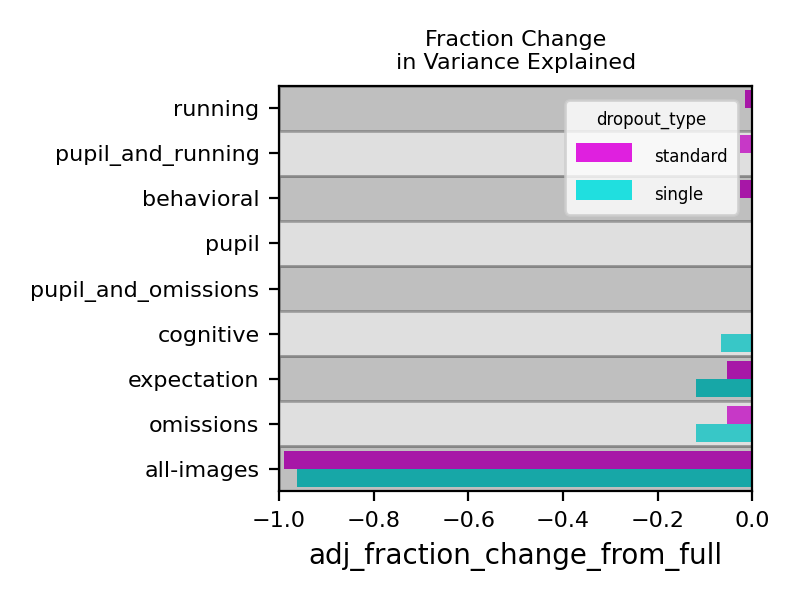

In [498]:
fig, ax = plt.subplots(figsize=(4,3))
show_dropout_summary(ophys_experiment_id, cell_specimen_id, glm_version, ax)
fig.tight_layout()